<a href="https://colab.research.google.com/github/amulyakamatagi/python-moments-of-business/blob/main/Simple_linear_regression(newspaperdata).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing all libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# loading the data

In [5]:
news_data=pd.read_csv('NewspaperData.csv')
news_data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [7]:
news_data.shape

(34, 3)

In [8]:
type(news_data)

pandas.core.frame.DataFrame

In [10]:
news_data.max() # maximum circulated newspaper

Newspaper    Washington Post
daily               1209.225
sunday              1762.015
dtype: object

In [12]:
news_data.min() # minimum circulated data

Newspaper    Baltimore Sun
daily              133.239
sunday             202.614
dtype: object

In [13]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [14]:
news_data.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [15]:
news_data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [16]:
news_data.tail()

,Newspaper,daily,sunday
29,San Francisco Chronicle,570.364,704.322
30,St. Louis Post-Dispatch,391.286,585.681
31,St. Paul Pioneer Press,201.860,267.781
32,Tampa Tribune,321.626,408.343
33,Washington Post,838.902,1165.567


In [17]:
news_data.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

<Axes: >

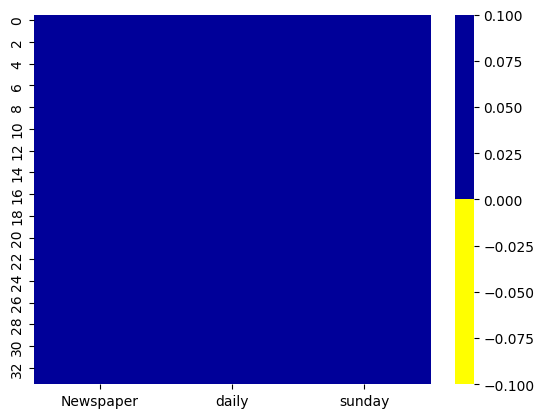

In [18]:
cols=news_data.columns
colour=['#ffff00','#000099']
sns.heatmap(news_data[cols].isnull(),cmap=sns.color_palette(colour))

In [22]:
news_data[news_data.duplicated()]

,Newspaper,daily,sunday


In [23]:
# therefore , the data is free from all the null values and duplicate values

In [24]:
# graphical representation

<Axes: xlabel='daily', ylabel='sunday'>

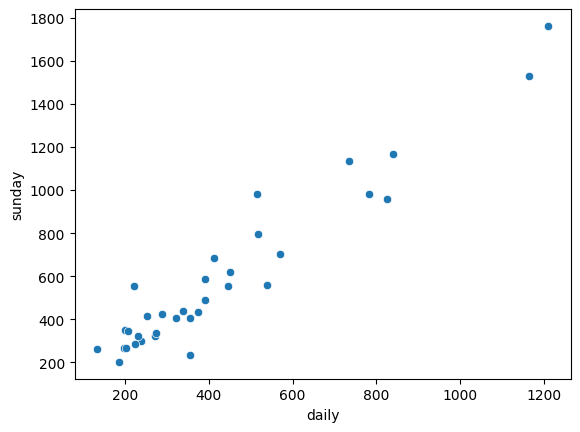

In [25]:
sns.scatterplot(x='daily',y='sunday',data=news_data)

In [27]:
# there is positive linear association between two variables
# as the daily circulation increases , the sunday circulation also increases

<Axes: xlabel='daily', ylabel='sunday'>

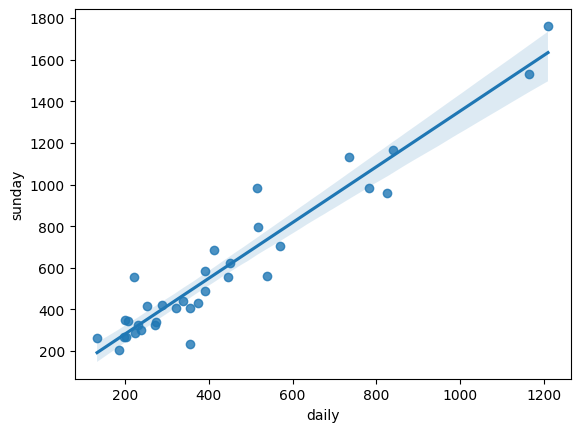

In [30]:
# line of best fit
sns.regplot(x='daily',y='sunday',data=news_data)


In [50]:
news_data.corr()

<ipython-input-50-c13c94b64f72>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  news_data.corr()


,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [32]:
# simple linear regression

In [41]:
import statsmodels.formula.api as smf
model=smf.ols('sunday~daily',data=news_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           6.02e-19
Time:                        15:16:34   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#inference
# multiplr Rsquare value is 91% (good enough)
# parameters =βo=13.83,β1=1.33
# pvalue < 0.05(x is significant)

In [42]:
model.params # only parameters

Intercept    13.835630
daily         1.339715
dtype: float64

In [43]:
print(model.tvalues, '/n' , model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 /n Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [44]:
# predictions

In [45]:
newdata=pd.Series([250,300,350])


In [46]:
pred=pd.DataFrame(newdata,columns=['daily'])

In [49]:
model.predict(pred) # predicted values

0    348.764319
1    415.750057
2    482.735795
dtype: float64